# Charts Demo

In [1]:
#downloading Data...
#portfolio consists of 2 stocks, 1 ETF, 1 Mutual Fund, and 1 currency
import pandas_datareader as pdr
tlt = pdr.get_data_yahoo('TLT')
att = pdr.get_data_yahoo('T')
f500 = pdr.get_data_yahoo('FXAIX')
jnj = pdr.get_data_yahoo('JNJ')
usd_jpy = pdr.get_data_yahoo('JPY=X')
import pandas as pd
port = pd.DataFrame({'tlt':pd.DataFrame.reset_index(tlt).iloc[:,6], 'att':pd.DataFrame.reset_index(att).iloc[:,6],
                   'f500':pd.DataFrame.reset_index(f500).iloc[:,6],'jnj':pd.DataFrame.reset_index(jnj).iloc[:,6],
                    'usd_jpy':pd.DataFrame.reset_index(usd_jpy).iloc[:,6]})
port_ret = port.pct_change().dropna()

In [2]:
#checking Data
port_ret.head()

,tlt,att,f500,jnj,usd_jpy
1,-0.009361,0.016597,0.016855,0.019274,-0.003437
2,0.015587,-0.009038,-0.021607,-0.019112,0.006626
3,-0.003101,0.015299,0.000454,0.005155,-0.010262
4,0.010530,-0.017676,-0.011491,-0.017949,0.003368
5,-0.006789,0.018879,0.005200,0.001984,0.001542


In [52]:
from pyPortfolioAnalysis import *
#adding constraints and objectives in a portfolio
p1 = portfolio_spec(assets = list(port_ret.columns))
add_constraint(p1, 'long_only')
add_constraint(p1, 'full_investment')
add_constraint(p1, kind = 'group', groups = {'stocks':[1,3], 'mf_etf':[0,2], 'fx':[4]},
              group_min = [0.3, 0.2, 0.1], group_max = [0.4, 0.99, 0.5])
add_objective(p1, kind='return', name = 'mean', target = 0.001)
add_objective(p1, kind='risk', name = 'std', target = .008)
p1.port_summary()
constraints = get_constraints(p1)
#summary method is useful to get the complete picture of the portfolio
p1.port_summary()

{'Assets': ['tlt', 'att', 'f500', 'jnj', 'usd_jpy'],
 'Number of Assets': 5,
 'category_labels': None,
 'Constraints': {'long_only': {'minimum': array([0, 0, 0, 0, 0]),
   'maximum': array([1, 1, 1, 1, 1]),
   'enabled': True},
  'full_investment': {'min_sum': 1, 'max_sum': 1, 'enabled': True},
  'group': {'groups': {'stocks': [1, 3], 'mf_etf': [0, 2], 'fx': [4]},
   'group_min': [0.3, 0.2, 0.1],
   'group_max': [0.4, 0.99, 0.5],
   'group_label': ['stocks', 'mf_etf', 'fx'],
   'enabled': True}},
 'Objectives': {'return': {'target': 0.001,
   'multiplier': -1,
   'arguments': {},
   'enabled': True,
   'name': 'mean'},
  'risk': {'target': 0.008,
   'multiplier': -1,
   'arguments': {},
   'enabled': True,
   'name': 'std'}}}

In [53]:
optimize_portfolio(port_ret, p1, optimize_method = 'DEoptim', search_size = 30000)

differential_evolution step 1: f(x)= 28.5899
differential_evolution step 2: f(x)= 28.5899
differential_evolution step 3: f(x)= 28.5899
differential_evolution step 4: f(x)= 28.5899
differential_evolution step 5: f(x)= 28.5899
differential_evolution step 6: f(x)= 28.5899
differential_evolution step 7: f(x)= 28.5899
differential_evolution step 8: f(x)= 28.5899
differential_evolution step 9: f(x)= 28.5899
differential_evolution step 10: f(x)= 28.5899
differential_evolution step 11: f(x)= 28.5899
differential_evolution step 12: f(x)= 28.5899
differential_evolution step 13: f(x)= 28.5899
differential_evolution step 14: f(x)= 28.5899
differential_evolution step 15: f(x)= 28.5899
differential_evolution step 16: f(x)= 28.5899
differential_evolution step 17: f(x)= 25.9204
differential_evolution step 18: f(x)= 25.9204
differential_evolution step 19: f(x)= 25.9204
differential_evolution step 20: f(x)= 19.3404
differential_evolution step 21: f(x)= 19.3404
differential_evolution step 22: f(x)= 10.11

differential_evolution step 179: f(x)= 4.97417
differential_evolution step 180: f(x)= 4.96732
differential_evolution step 181: f(x)= 4.96732
differential_evolution step 182: f(x)= 4.96732
differential_evolution step 183: f(x)= 4.96732
differential_evolution step 184: f(x)= 4.96732
differential_evolution step 185: f(x)= 4.96732
differential_evolution step 186: f(x)= 4.96732
differential_evolution step 187: f(x)= 4.96732
differential_evolution step 188: f(x)= 4.96732
differential_evolution step 189: f(x)= 4.96376
differential_evolution step 190: f(x)= 4.96376
differential_evolution step 191: f(x)= 4.96376
differential_evolution step 192: f(x)= 4.96376


[{'weights': {'tlt': 0.13946691707342773,
   'att': 0.004334314279153654,
   'f500': 0.4225054237030385,
   'jnj': 0.3321501071128092,
   'usd_jpy': 0.10154323292635768}},
 {'objective_measures': [['return', array(0.00050303)],
   ['risk', array(0.00799985)]]},
 {'best': 4.962773702876129}]

In [54]:
p1.optimal_portfolio()

{'Assets': ['tlt', 'att', 'f500', 'jnj', 'usd_jpy'],
 'Number of Assets': 5,
 'category_labels': None,
 'Weights': array([0.13946692, 0.00433431, 0.42250542, 0.33215011, 0.10154323]),
 'Objective_measures': [['return', array(0.00050303)],
  ['risk', array(0.00799985)]]}

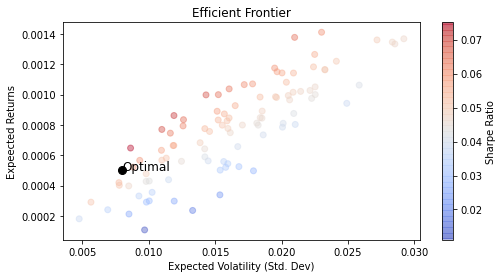

In [55]:
chart_efficient_frontier(p1,port_ret, rand_pf = 100, figsize = (8,4), alpha = 0.1)

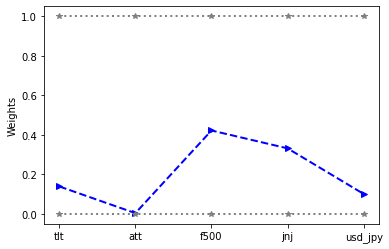

In [56]:
chart_weights(p1)

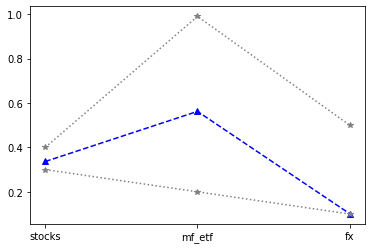

In [57]:
chart_group_weights(p1)